In [1]:
import numpy as np
import pandas as pd
from base_root import base_path

from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
plt.figure(figsize=[15,5])
import seaborn as sns
%matplotlib inline

C:\Users\RutulPatel\.conda\envs\mytf\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Figure size 1500x500 with 0 Axes>

In [2]:
df = pd.read_csv(base_path()+'Jupyter/Cars-Dataset/cars_final.csv')

In [3]:
df.columns

Index(['Manufacturing_Year', 'Build_Type', 'Transmission', 'Fuel_Type',
       'Manufacturer', 'Model', 'Engine Type', 'Seating Capacity', 'Price',
       'Kilometers_Driven', 'Mileage'],
      dtype='object')

In [4]:
df.describe(include='all')

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Model,Engine Type,Seating Capacity,Price,Kilometers_Driven,Mileage
count,37814.000000,37814,37814,37814,37814,37814,37814,37814.000000,3.781400e+04,3.781400e+04,37814.000000
unique,NaN,10,2,5,46,382,599,NaN,NaN,NaN,NaN
top,NaN,Hatchback,Manual,Petrol,Maruti,Honda City,In-Line Engine,NaN,NaN,NaN,NaN
freq,NaN,15055,28895,21773,9951,1911,3427,NaN,NaN,NaN,NaN
mean,2015.569472,NaN,NaN,NaN,NaN,NaN,NaN,5.236605,7.999749e+05,6.240934e+04,19.351258
std,3.779047,NaN,NaN,NaN,NaN,NaN,NaN,0.722088,3.043006e+06,5.847148e+04,4.387735
min,1983.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.196300e+04,1.010000e+02,7.080000
25%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,3.200000e+05,3.173950e+04,17.000000
50%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,5.250000e+05,5.672600e+04,19.000000
75%,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,8.552040e+05,8.330775e+04,21.400000


In [5]:
df.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99])

,Manufacturing_Year,Seating Capacity,Price,Kilometers_Driven,Mileage
count,37814.000000,37814.000000,3.781400e+04,3.781400e+04,37814.000000
mean,2015.569472,5.236605,7.999749e+05,6.240934e+04,19.351258
std,3.779047,0.722088,3.043006e+06,5.847148e+04,4.387735
min,1983.000000,0.000000,1.196300e+04,1.010000e+02,7.080000
25%,2013.000000,5.000000,3.200000e+05,3.173950e+04,17.000000
50%,2016.000000,5.000000,5.250000e+05,5.672600e+04,19.000000
75%,2018.000000,5.000000,8.552040e+05,8.330775e+04,21.400000
90%,2021.000000,7.000000,1.550000e+06,1.132422e+05,24.300000
95%,2021.000000,7.000000,2.150000e+06,1.323862e+05,25.830000
99%,2022.000000,8.000000,4.871750e+06,1.917816e+05,30.480000


### Droping features that are not required to build the model


In [6]:
df_dropped = df.drop(labels=['Model','Engine Type'], axis=1)

# Exploratoratory Data Analysis

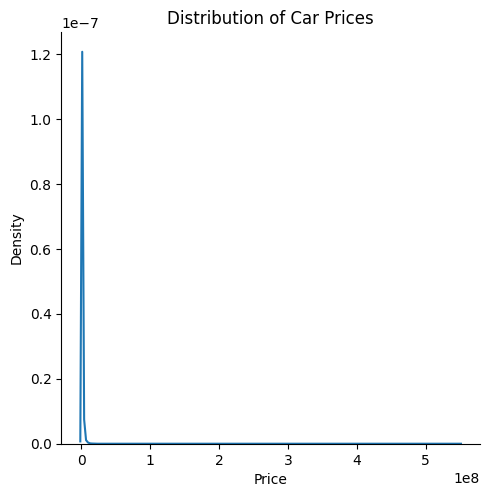

In [7]:
# Simple density plot
sns.displot(df_dropped, x='Price', kind='kde') 
plt.xlabel("Price")
plt.title("Distribution of Car Prices")
plt.show()

In [8]:
q = df_dropped['Price'].quantile(0.97)
q

2950000.0

In [9]:
data_1 = df_dropped[df_dropped['Price']<q]

C:\Users\RutulPatel\AppData\Local\Temp\ipykernel_11592\4096200972.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])


Text(0.5, 1.0, 'Car Price Distribution Plot')

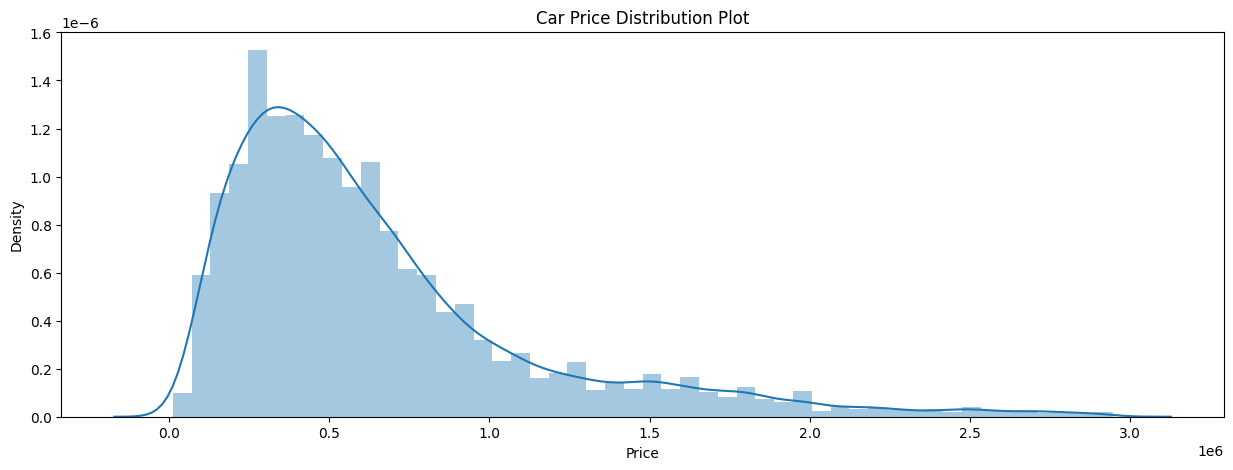

In [10]:
#check the PDF once again
plt.figure(figsize=[15,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')

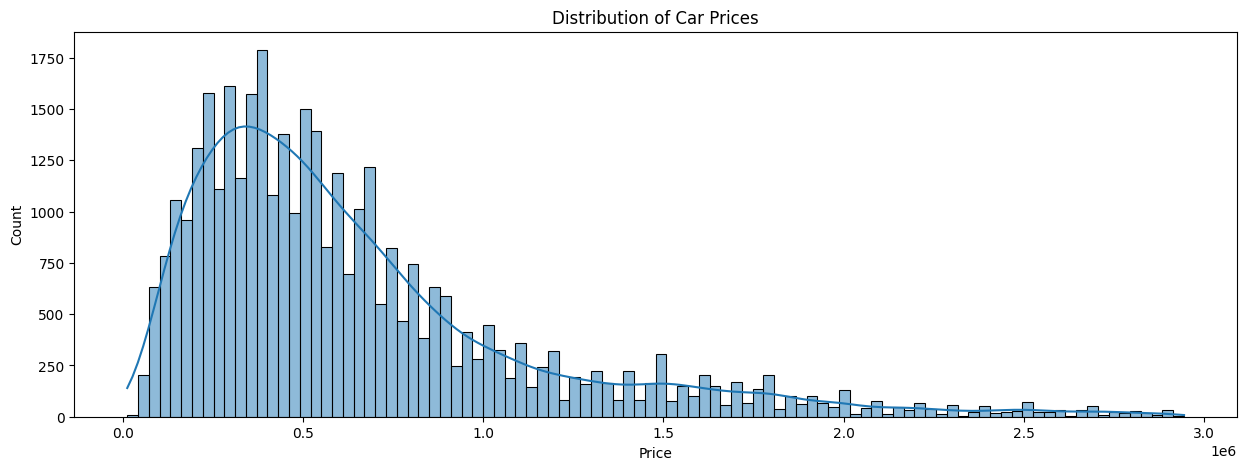

In [11]:
# Histogram
plt.figure(figsize=[15,5])
sns.histplot(data_1, x='Price', kde=True)
plt.xlabel("Price")
plt.title("Distribution of Car Prices")
plt.show()

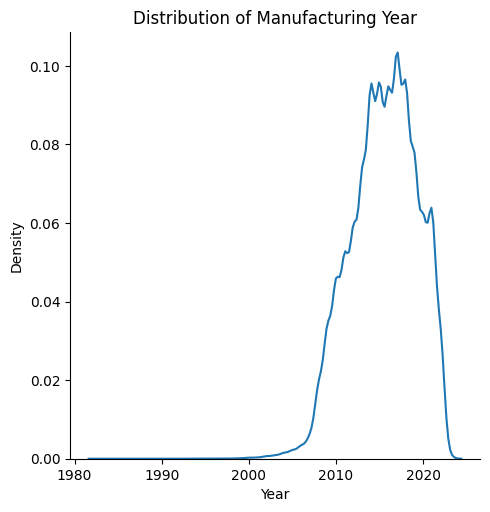

In [12]:
sns.displot(data_1, x='Manufacturing_Year', kind='kde') 
plt.xlabel("Year")
plt.title("Distribution of Manufacturing Year")
plt.show()

In [13]:
q = data_1['Manufacturing_Year'].quantile(0.01)
q

2007.0

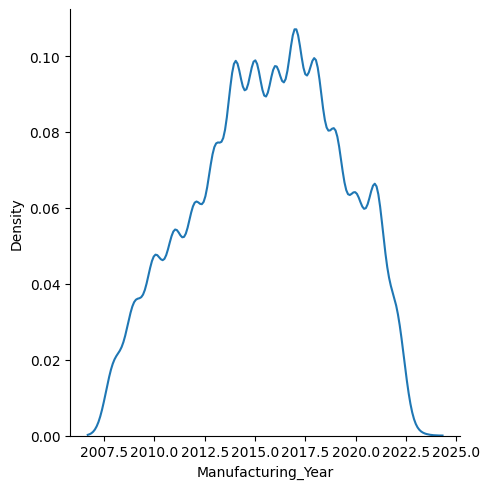

In [14]:
data_2 = data_1[data_1['Manufacturing_Year']>q]
sns.displot(data_2, x='Manufacturing_Year', kind='kde') 

## - Mileage

In [15]:
df['Mileage'].describe()

count    37814.000000
mean        19.351258
std          4.387735
min          7.080000
25%         17.000000
50%         19.000000
75%         21.400000
max        120.000000
Name: Mileage, dtype: float64

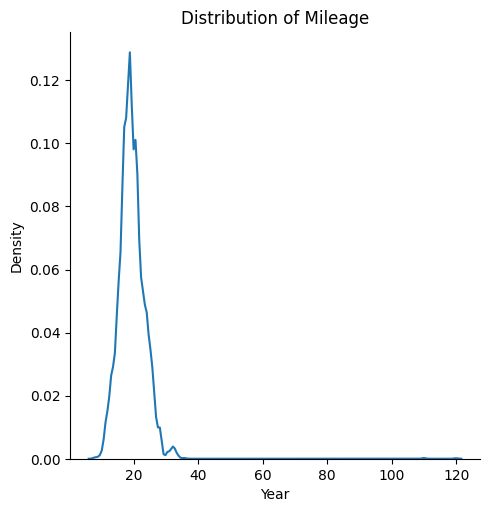

In [16]:
sns.displot(data_2, x='Mileage', kind='kde') 
plt.xlabel("Year")
plt.title("Distribution of Mileage")
plt.show()

In [17]:
q = data_2['Mileage'].quantile(0.99)
q

30.48

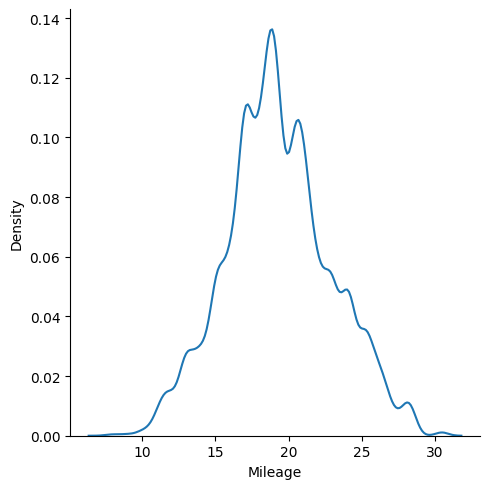

In [18]:
data_3 = data_2[data_2['Mileage']<q]
sns.displot(data_3, x='Mileage', kind='kde') 

In [19]:
data_3.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99], include='all')

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Seating Capacity,Price,Kilometers_Driven,Mileage
count,35740.000000,35740,35740,35740,35740,35740.000000,3.574000e+04,3.574000e+04,35740.000000
unique,NaN,10,2,5,37,NaN,NaN,NaN,NaN
top,NaN,Hatchback,Manual,Petrol,Maruti,NaN,NaN,NaN,NaN
freq,NaN,14420,28010,21073,9446,NaN,NaN,NaN,NaN
mean,2015.598489,NaN,NaN,NaN,NaN,5.234975,6.623300e+05,6.254235e+04,19.332045
std,3.568041,NaN,NaN,NaN,NaN,0.705189,5.002372e+05,4.330565e+04,3.577822
min,2008.000000,NaN,NaN,NaN,NaN,0.000000,4.444400e+04,1.010000e+02,7.690000
25%,2013.000000,NaN,NaN,NaN,NaN,5.000000,3.200000e+05,3.224525e+04,17.000000
50%,2016.000000,NaN,NaN,NaN,NaN,5.000000,5.185655e+05,5.720000e+04,19.010000
75%,2018.000000,NaN,NaN,NaN,NaN,5.000000,8.250000e+05,8.376125e+04,21.460000


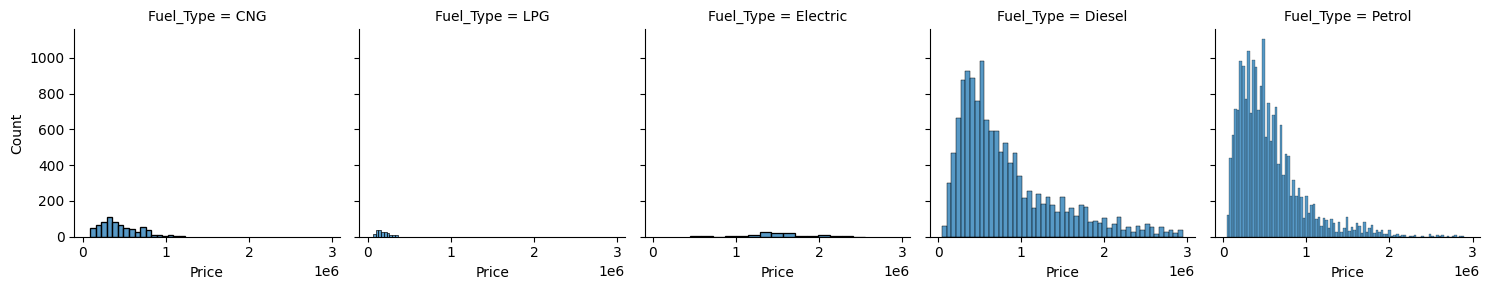

In [20]:
grid = sns.FacetGrid(data_3, col='Fuel_Type')
grid.map(sns.histplot, 'Price')
plt.show()

## Handling Manufacturers

In [21]:
df.iloc[2185:2190]

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Model,Engine Type,Seating Capacity,Price,Kilometers_Driven,Mileage
2185,2011,MUV,Manual,Diesel,Toyota,Toyota Innova,In-Line Engine,7,650000,214500,12.80
2186,2020,MUV,Manual,Diesel,Mahindra,Mahindra Marazzo,D15 1.5 Litre Diesel Engine,8,950000,50000,17.30
2187,2020,MUV,Manual,Petrol,Renault,Renault Triber,1.0L Petrol Engine,7,800000,6000,20.00
2188,2014,MUV,Manual,Diesel,Ashok Leyland,Ashok Leyland Stile,Intercooled Diesel Engine,8,350000,120000,20.07
2189,2011,MUV,Manual,Diesel,Toyota,Toyota Innova,In-Line Engine,7,700000,120000,12.80


In [22]:
rows_index = (data_3[data_3['Manufacturer'] == 'Mahindra Ssangyong'].index)
print(rows_index)

Index([13470, 13471, 13472, 13473, 13474, 13475, 13476, 13477, 13478, 13479,
       13480, 13481, 13482, 13483, 13484, 13485, 13486, 13487, 13488, 13489,
       13490, 13491, 13492, 13493, 13494, 13495, 13496, 13497, 13498, 13499,
       13500, 13501, 13502, 13503, 13504, 13505, 13506, 13507, 13508, 13509,
       13510, 13511, 13512, 13513, 13514, 13515, 13516, 13517, 13518, 13519,
       13520],
      dtype='int64')


In [23]:
for idx in rows_index:
    data_3.loc[idx, 'Manufacturer'] = 'Mahindra'

In [24]:
(data_3['Manufacturer'].value_counts())

Manufacturer
Maruti              9446
Hyundai             7277
Honda               3837
Mahindra            2138
Tata                2000
Renault             1180
Ford                1130
Toyota              1124
Volkswagen          1061
Skoda                994
Chevrolet            848
Kia                  712
Nissan               652
Audi                 561
Mercedes-Benz        550
BMW                  493
MG                   407
Datsun               357
Jeep                 347
Fiat                 250
Volvo                 90
Mitsubishi            77
Jaguar                63
Land Rover            46
Isuzu                 31
Mahindra Renault      20
Mini                  18
Force                 10
Porsche                5
Citroen                4
ICML                   3
Bajaj                  3
Hindustan Motors       2
Premier                2
Ashok Leyland          1
DC                     1
Name: count, dtype: int64

In [25]:
rows_index = (data_3[data_3['Manufacturer'] == 'Mahindra Renault'].index)
print(rows_index)

Index([13584, 13585, 13586, 13587, 13588, 13590, 13591, 13592, 13593, 13594,
       13595, 13596, 13598, 13599, 13600, 13601, 13602, 13603, 13604, 13605],
      dtype='int64')


In [26]:
for idx in rows_index:
    data_3.loc[idx, 'Manufacturer'] = 'Renault'

In [27]:
def others(df):
    counts = df['Manufacturer'].value_counts()
    manufacturers_to_replace = counts[counts <= 50].index  # Isolate manufacturers below threshold

    # Apply the replacement within the DataFrame
    df['Manufacturer'] = df['Manufacturer'].replace(manufacturers_to_replace, 'Other')
    return df 
    
data_4 = others(data_3.copy()) 

In [28]:
(data_4['Manufacturer'].value_counts())

Manufacturer
Maruti           9446
Hyundai          7277
Honda            3837
Mahindra         2138
Tata             2000
Renault          1200
Ford             1130
Toyota           1124
Volkswagen       1061
Skoda             994
Chevrolet         848
Kia               712
Nissan            652
Audi              561
Mercedes-Benz     550
BMW               493
MG                407
Datsun            357
Jeep              347
Fiat              250
Other             126
Volvo              90
Mitsubishi         77
Jaguar             63
Name: count, dtype: int64

In [29]:
data_4['Kilometers_Driven'].describe()

count    3.574000e+04
mean     6.254235e+04
std      4.330565e+04
min      1.010000e+02
25%      3.224525e+04
50%      5.720000e+04
75%      8.376125e+04
max      1.466000e+06
Name: Kilometers_Driven, dtype: float64

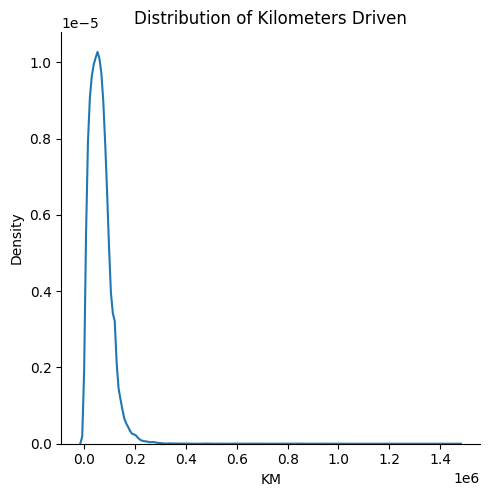

In [30]:
sns.displot(data_4, x='Kilometers_Driven', kind='kde') 
plt.xlabel("KM")
plt.title("Distribution of Kilometers Driven")
plt.show()

In [31]:
q = data_4['Kilometers_Driven'].quantile(0.99)
q

191945.64

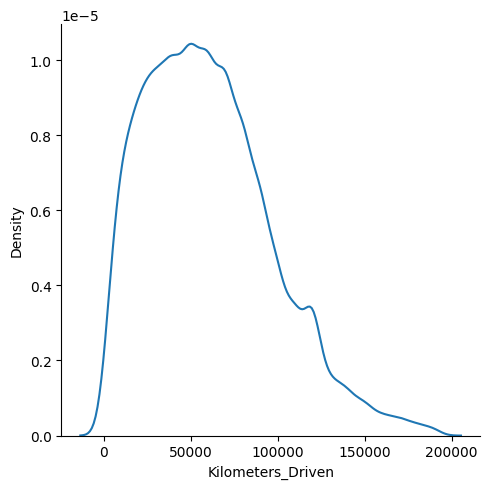

In [32]:
data_5 = data_4[data_4['Kilometers_Driven']<q]
sns.displot(data_5, x='Kilometers_Driven', kind='kde') 

In [33]:
data_5.describe(include='all')

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Seating Capacity,Price,Kilometers_Driven,Mileage
count,35382.00000,35382,35382,35382,35382,35382.000000,3.538200e+04,35382.000000,35382.000000
unique,NaN,10,2,5,24,NaN,NaN,NaN,NaN
top,NaN,Hatchback,Manual,Petrol,Maruti,NaN,NaN,NaN,NaN
freq,NaN,14337,27687,20995,9374,NaN,NaN,NaN,NaN
mean,2015.62854,NaN,NaN,NaN,NaN,5.228365,6.643703e+05,60576.039936,19.346158
std,3.56377,NaN,NaN,NaN,NaN,0.695425,5.009317e+05,36506.227247,3.565871
min,2008.00000,NaN,NaN,NaN,NaN,0.000000,4.444400e+04,101.000000,7.690000
25%,2013.00000,NaN,NaN,NaN,NaN,5.000000,3.200000e+05,32000.000000,17.000000
50%,2016.00000,NaN,NaN,NaN,NaN,5.000000,5.200000e+05,56792.000000,19.010000
75%,2018.00000,NaN,NaN,NaN,NaN,5.000000,8.254340e+05,82593.500000,21.460000


In [34]:
cleaned_data = data_5.reset_index(drop=True)
cleaned_data.describe()

,Manufacturing_Year,Seating Capacity,Price,Kilometers_Driven,Mileage
count,35382.00000,35382.000000,3.538200e+04,35382.000000,35382.000000
mean,2015.62854,5.228365,6.643703e+05,60576.039936,19.346158
std,3.56377,0.695425,5.009317e+05,36506.227247,3.565871
min,2008.00000,0.000000,4.444400e+04,101.000000,7.690000
25%,2013.00000,5.000000,3.200000e+05,32000.000000,17.000000
50%,2016.00000,5.000000,5.200000e+05,56792.000000,19.010000
75%,2018.00000,5.000000,8.254340e+05,82593.500000,21.460000
max,2023.00000,14.000000,2.945000e+06,191931.000000,30.470000


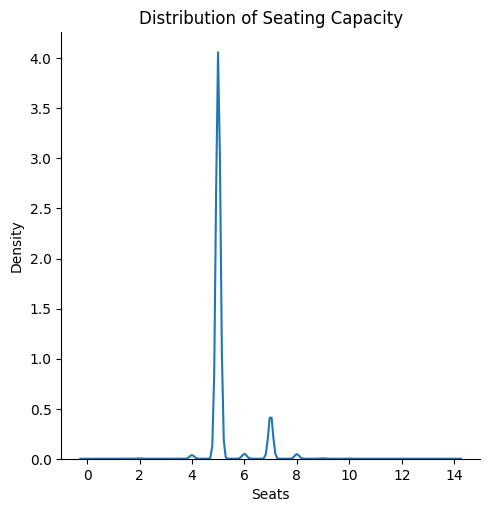

In [35]:
sns.displot(data_5, x='Seating Capacity', kind='kde') 
plt.xlabel("Seats")
plt.title("Distribution of Seating Capacity")
plt.show()

In [36]:
data_5['Seating Capacity'].value_counts()

Seating Capacity
5     30889
7      3405
6       376
8       356
4       279
9        31
2        20
10       13
0        10
14        2
13        1
Name: count, dtype: int64

In [37]:
q = data_5['Seating Capacity'].quantile(0.99)
q

8.0

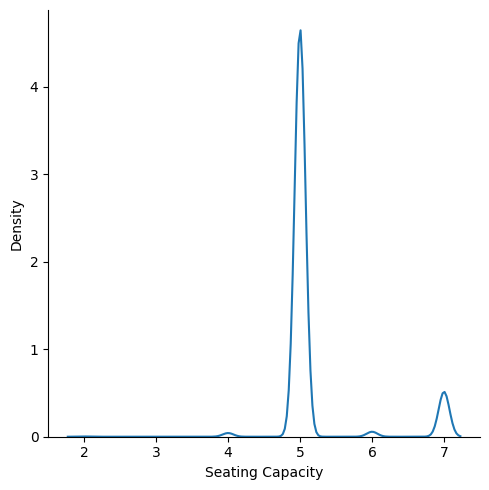

In [38]:
data_5 = data_5[data_5['Seating Capacity']>0]
data_5 = data_5[data_5['Seating Capacity']<q]
sns.displot(data_5, x='Seating Capacity', kind='kde') 


In [39]:
data_5['Seating Capacity'].value_counts()

Seating Capacity
5    30889
7     3405
6      376
4      279
2       20
Name: count, dtype: int64

In [40]:
data_5['Build_Type'].value_counts()

Build_Type
Hatchback          14336
Sedan               9779
SUV                 9030
MUV                 1413
Minivans             299
Luxury Vehicles       59
Pickup Trucks         44
Wagon                  4
Convertibles           3
Coupe                  2
Name: count, dtype: int64

In [41]:
def others(df):
    counts = df['Build_Type'].value_counts()
    buildtypes_to_replace = counts[counts <= 50].index  # Isolate build_types below threshold

    # Apply the replacement within the DataFrame
    df['Build_Type'] = df['Build_Type'].replace(buildtypes_to_replace, 'Other')
    return df 
    
data_6 = others(data_5.copy()) 

In [42]:
data_6['Build_Type'].value_counts()

Build_Type
Hatchback          14336
Sedan               9779
SUV                 9030
MUV                 1413
Minivans             299
Luxury Vehicles       59
Other                 53
Name: count, dtype: int64

In [43]:
data_6.head()

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Seating Capacity,Price,Kilometers_Driven,Mileage
0,2016,Hatchback,Manual,CNG,Maruti,5,370000,69162,26.60
2,2015,Sedan,Manual,CNG,Honda,5,421000,81506,18.00
3,2013,Hatchback,Manual,CNG,Maruti,5,240000,115893,26.20
4,2022,MUV,Manual,CNG,Maruti,7,1175000,18900,26.11
5,2012,Hatchback,Manual,CNG,Maruti,5,250000,60000,26.60


Text(0.5, 1.0, 'Price and Seats')

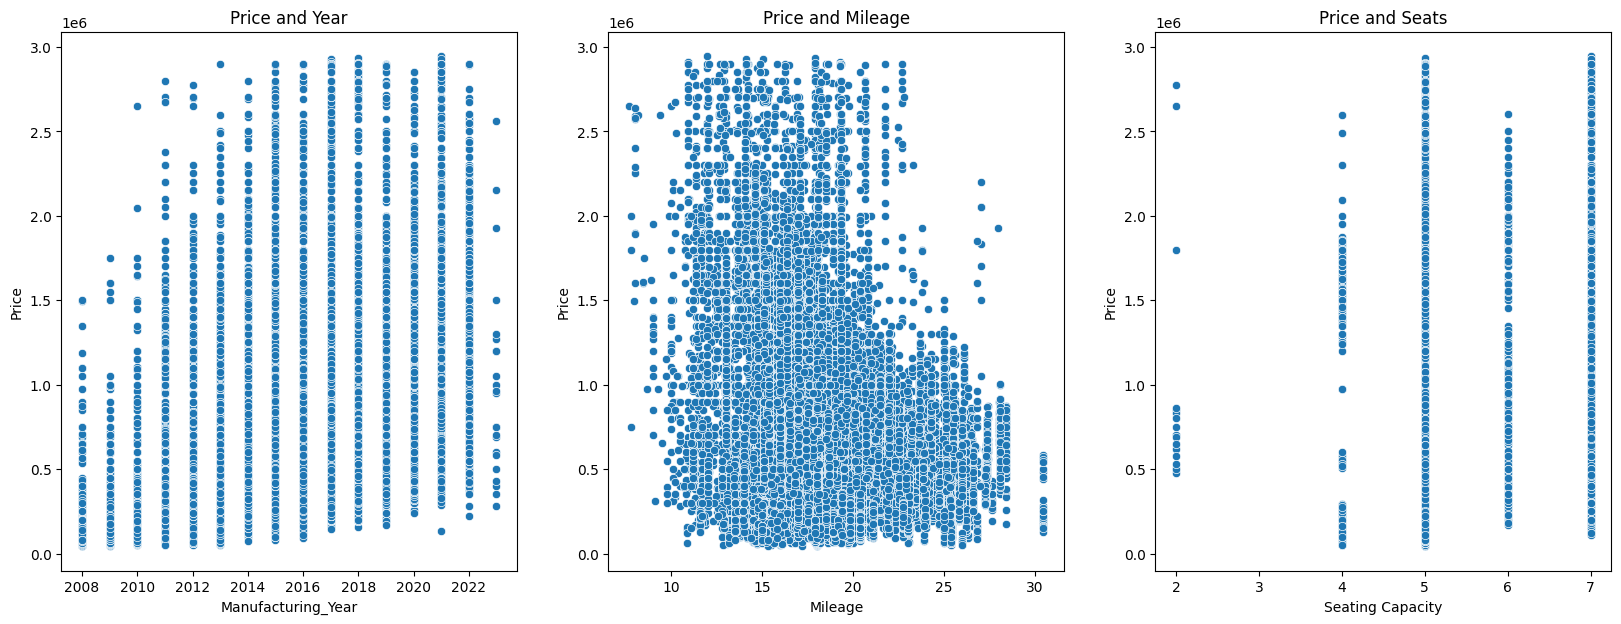

In [44]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(y='Price',x='Manufacturing_Year',data=data_6)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(y='Price',x='Mileage',data=data_6)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='Seating Capacity',data=data_6)
plt.title("Price and Seats")

In [45]:
log_price = np.log(data_6['Price'])

# Then we add it to our data frame
data_6['log_price'] = log_price
data_6.head()

,Manufacturing_Year,Build_Type,Transmission,Fuel_Type,Manufacturer,Seating Capacity,Price,Kilometers_Driven,Mileage,log_price
0,2016,Hatchback,Manual,CNG,Maruti,5,370000,69162,26.60,12.821258
2,2015,Sedan,Manual,CNG,Honda,5,421000,81506,18.00,12.950388
3,2013,Hatchback,Manual,CNG,Maruti,5,240000,115893,26.20,12.388394
4,2022,MUV,Manual,CNG,Maruti,7,1175000,18900,26.11,13.976779
5,2012,Hatchback,Manual,CNG,Maruti,5,250000,60000,26.60,12.429216


Text(0.5, 1.0, 'Price and Seats')

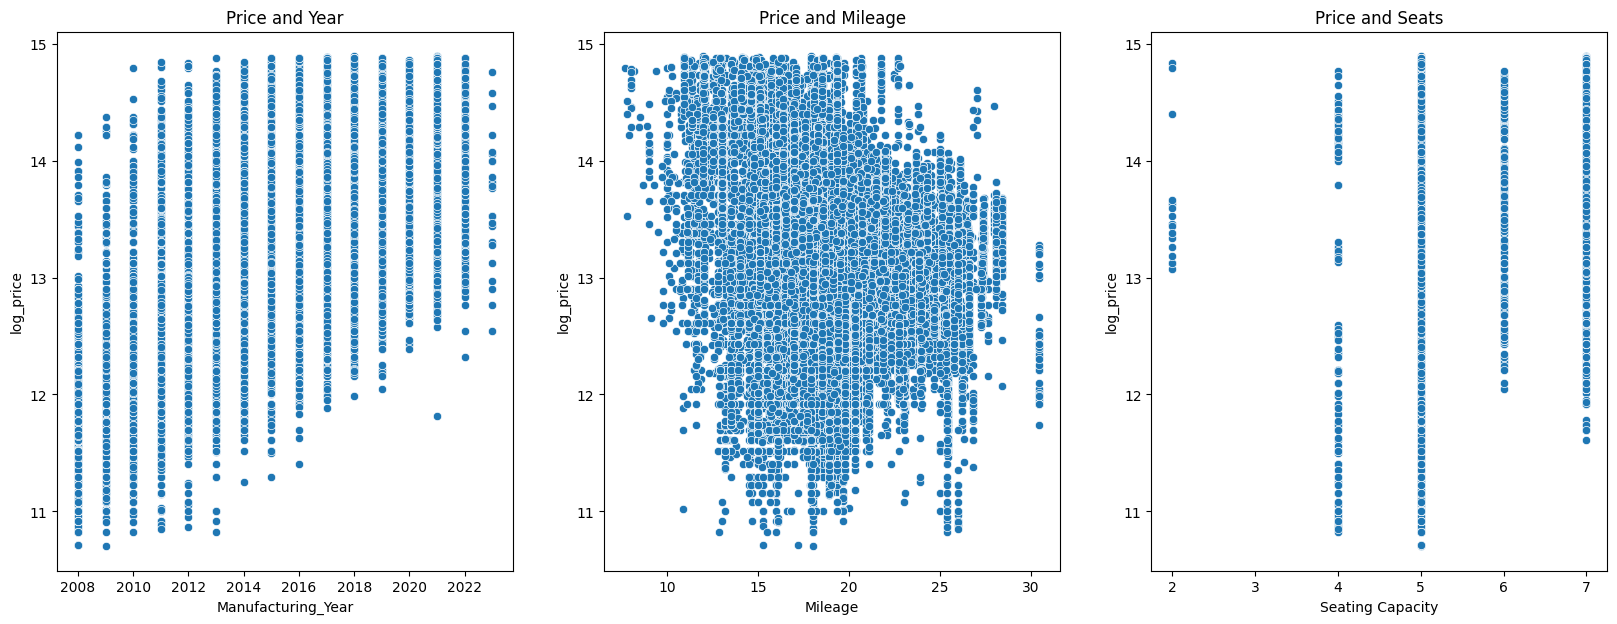

In [46]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(y='log_price',x='Manufacturing_Year',data=data_6)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(y='log_price',x='Mileage',data=data_6)

plt.subplot(1,3,3)
sns.scatterplot(y='log_price',x='Seating Capacity',data=data_6)
plt.title("Price and Seats")

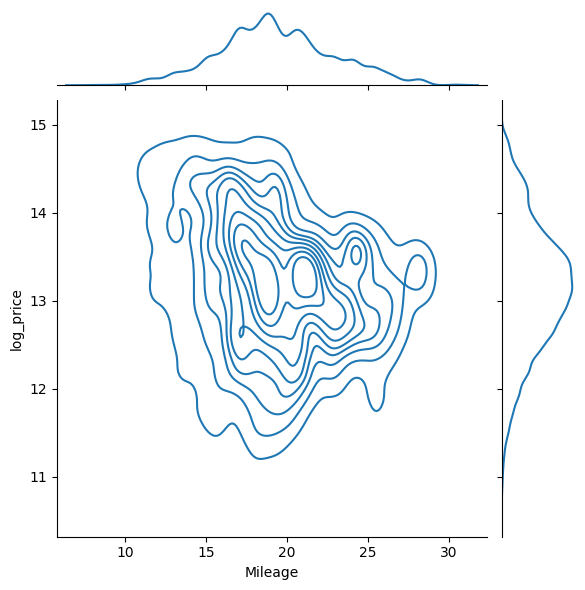

In [47]:
sns.jointplot(x='Mileage', y='log_price', data=data_6, kind='kde') 


<Axes: xlabel='Mileage', ylabel='log_price'>

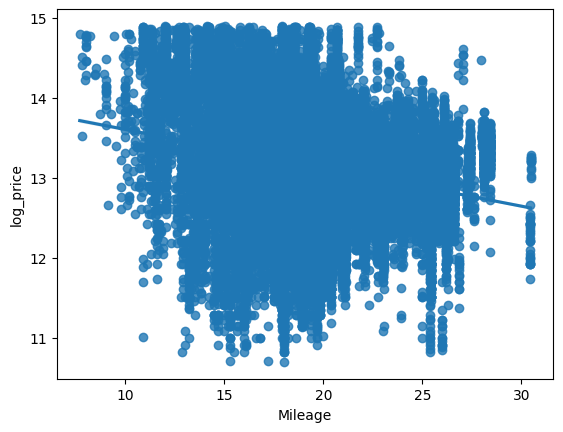

In [48]:
sns.regplot(x='Mileage', y='log_price', data=data_6)

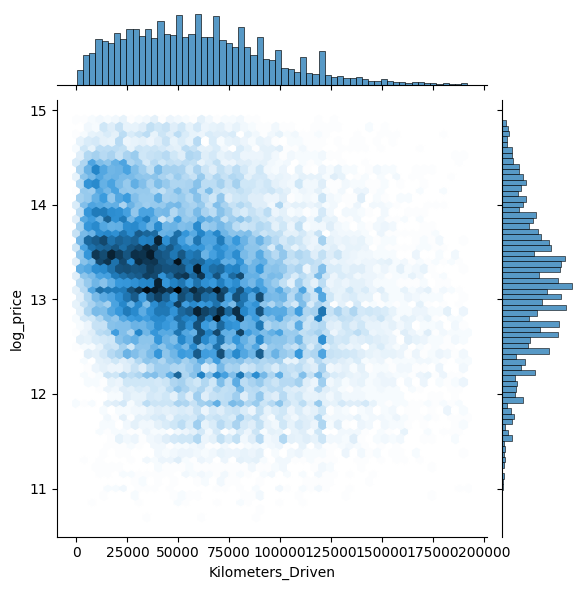

In [49]:
sns.jointplot(x='Kilometers_Driven', y='log_price', data=data_6, kind='hex')

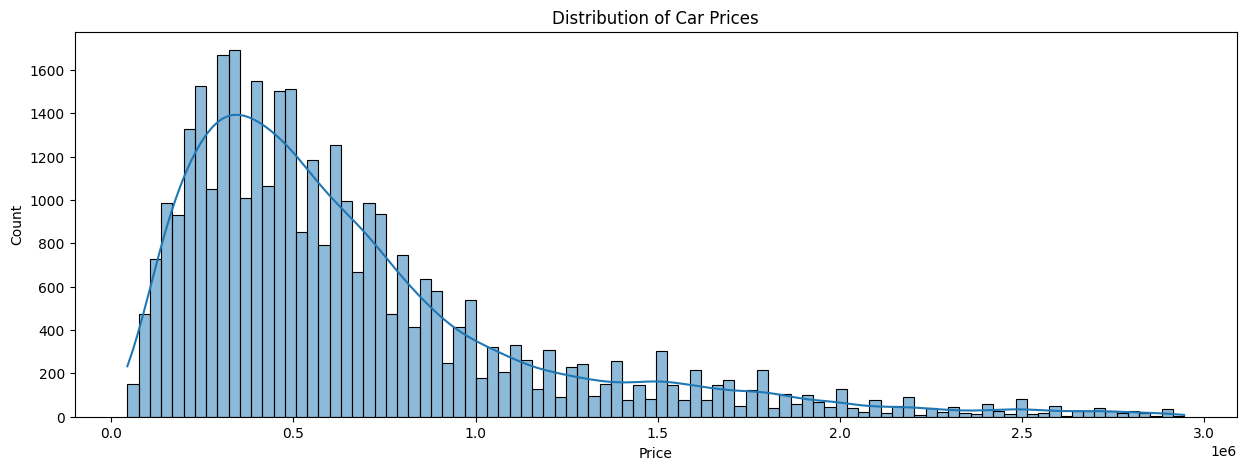

In [50]:
plt.figure(figsize=[15,5])
sns.histplot(data_6, x='Price', kde=True)
plt.xlabel("Price")
plt.title("Distribution of Car Prices")
plt.show()

In [51]:
# data_6.corr()

## New

Text(0, 0.5, 'Count of cars')

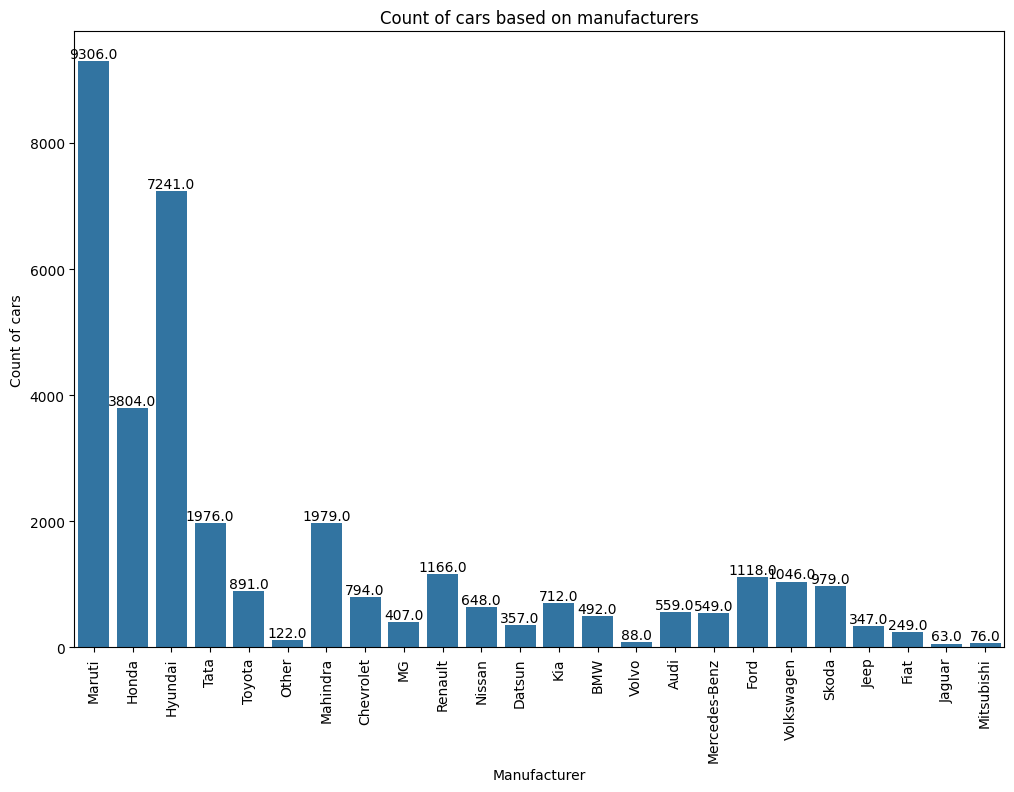

In [52]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = data_5)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

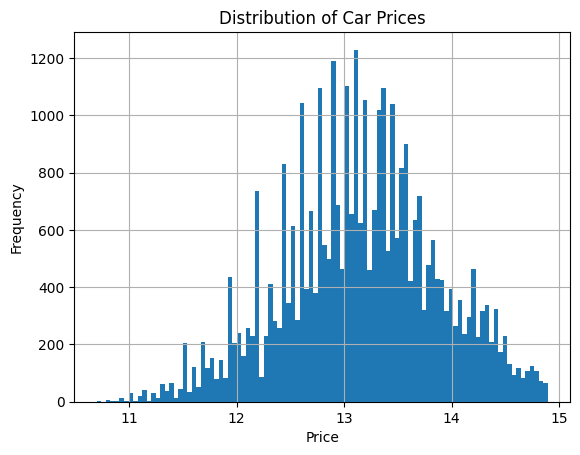

In [53]:
df['log_price'] = np.log10(df['Price'])
data_6['log_price'].hist(bins=100)  # You can adjust 'bins' for more/fewer bars
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Car Prices")
plt.show()

In [54]:
print(data_3['Price'].describe())

count    3.574000e+04
mean     6.623300e+05
std      5.002372e+05
min      4.444400e+04
25%      3.200000e+05
50%      5.185655e+05
75%      8.250000e+05
max      2.945000e+06
Name: Price, dtype: float64


## variance_inflation_factor 
(Multi-Colinearity)

In [55]:
variables = data_6[['Manufacturing_Year', 'Seating Capacity', 'Kilometers_Driven', 'Mileage']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
dict = {}
print(type(vif))
for i in vif:
    # dict[vif['VIF']] = vif['Features']
    print(i)
vif

<class 'pandas.core.frame.DataFrame'>
VIF
Features


,VIF,Features
0,141.110123,Manufacturing_Year
1,80.932785,Seating Capacity
2,3.805797,Kilometers_Driven
3,33.967499,Mileage


In [56]:
df_no_multicolinearity = data_6.drop(['Manufacturing_Year','Seating Capacity'],axis=1)

In [57]:
from sklearn.preprocessing import LabelEncoder
temp_data = df_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Price                0.905961
Transmission         0.461066
Build_Type           0.435250
Kilometers_Driven    0.317824
Mileage              0.233988
Fuel_Type            0.223933
Manufacturer         0.070026
dtype: float64


In [58]:
temp_data['Build_Type'].value_counts()

Build_Type
0    14336
6     9779
5     9030
2     1413
3      299
1       59
4       53
Name: count, dtype: int64

In [59]:
temp_data.corr()

,Build_Type,Transmission,Fuel_Type,Manufacturer,Price,Kilometers_Driven,Mileage,log_price
Build_Type,1.000000,-0.232178,-0.272298,-0.009765,0.397644,0.089269,-0.274564,0.435250
Transmission,-0.232178,1.000000,0.027317,0.017114,-0.509053,0.107026,0.280539,-0.461066
Fuel_Type,-0.272298,0.027317,1.000000,-0.063637,-0.232717,-0.368306,-0.242985,-0.223933
Manufacturer,-0.009765,0.017114,-0.063637,1.000000,0.028741,-0.020337,0.034682,0.070026
Price,0.397644,-0.509053,-0.232717,0.028741,1.000000,-0.265363,-0.321491,0.905961
Kilometers_Driven,0.089269,0.107026,-0.368306,-0.020337,-0.265363,1.000000,0.017467,-0.317824
Mileage,-0.274564,0.280539,-0.242985,0.034682,-0.321491,0.017467,1.000000,-0.233988
log_price,0.435250,-0.461066,-0.223933,0.070026,0.905961,-0.317824,-0.233988,1.000000


<Axes: >

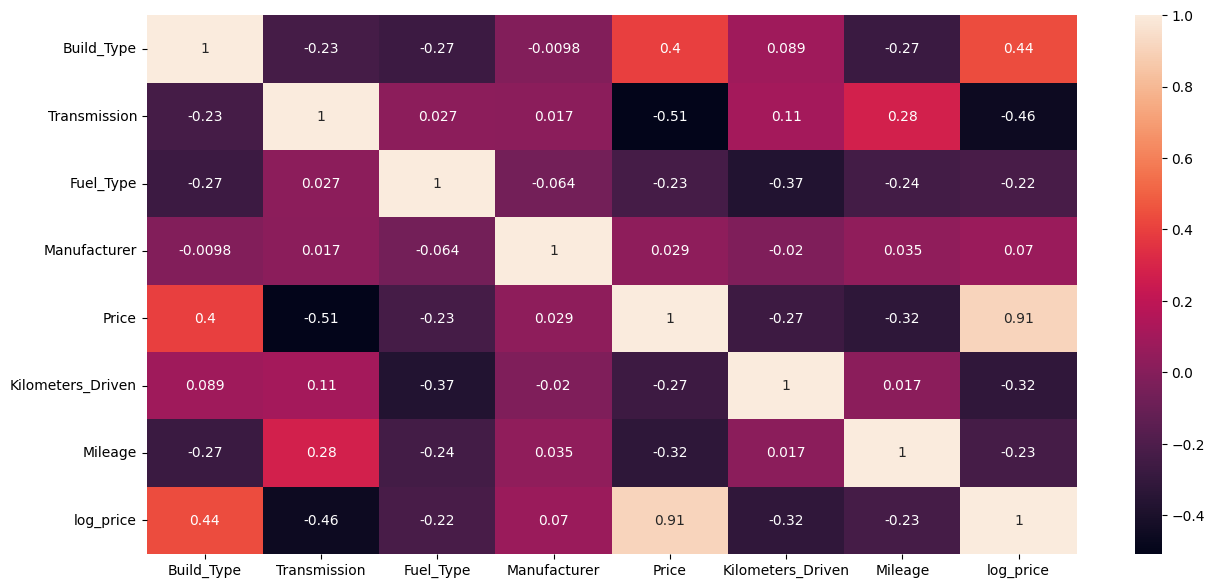

In [60]:
plt.figure(figsize=[15,7])
sns.heatmap(temp_data.corr(), annot=True)

## Feature importances

In [61]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop(['log_price','Price'],axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

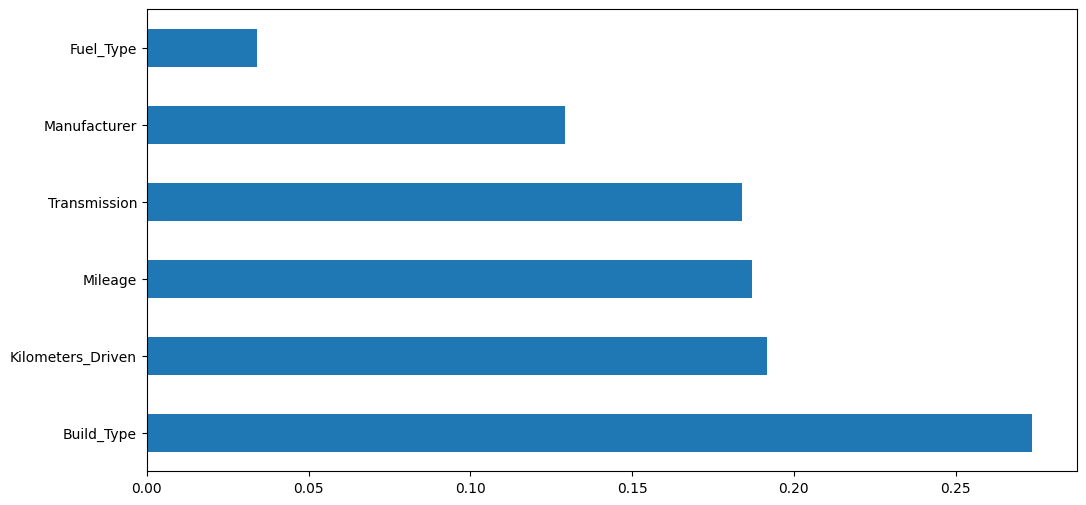

In [62]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [63]:
print(feat_importances.sort_values(ascending=False))

Build_Type           0.273702
Kilometers_Driven    0.191721
Mileage              0.187013
Transmission         0.184013
Manufacturer         0.129366
Fuel_Type            0.034184
dtype: float64


In [64]:
# raise Exception("Interruption")

# Finalization

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer

## Encoding & Scaling

### pd.get_dummies & Standard Scaler

In [66]:
data_with_dummies = pd.get_dummies(df_no_multicolinearity,drop_first=False)
data_with_dummies = data_with_dummies.drop('Price',axis=1)

In [67]:
data_with_dummies = data_with_dummies.reset_index(drop=True)
data_with_dummies.head(2)

,Kilometers_Driven,Mileage,log_price,Build_Type_Hatchback,Build_Type_Luxury Vehicles,Build_Type_MUV,Build_Type_Minivans,Build_Type_Other,Build_Type_SUV,Build_Type_Sedan,...,Manufacturer_Mercedes-Benz,Manufacturer_Mitsubishi,Manufacturer_Nissan,Manufacturer_Other,Manufacturer_Renault,Manufacturer_Skoda,Manufacturer_Tata,Manufacturer_Toyota,Manufacturer_Volkswagen,Manufacturer_Volvo
0,69162,26.6,12.821258,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,81506,18.0,12.950388,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [68]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

In [69]:
df_no_multicolinearity.nunique()

Build_Type               7
Transmission             2
Fuel_Type                5
Manufacturer            24
Price                 6268
Kilometers_Driven    22678
Mileage                554
log_price             6268
dtype: int64

In [70]:
standardScaler = StandardScaler()
standardScaler.fit(x)
X_train = standardScaler.transform(x)
# X_test = standardScaler.transform(x_test)

### One hot & Scalers

In [71]:
categorical_cols = df_no_multicolinearity.select_dtypes(include=['object', 'category']).columns
numerical_cols = df_no_multicolinearity.select_dtypes(include=['float64', 'int64']).columns

In [72]:
print(categorical_cols)
numerical_cols

Index(['Build_Type', 'Transmission', 'Fuel_Type', 'Manufacturer'], dtype='object')


Index(['Price', 'Kilometers_Driven', 'Mileage', 'log_price'], dtype='object')

In [73]:
categorical_cols = ['Build_Type', 'Transmission', 'Fuel_Type', 'Manufacturer']
numerical_cols = ['Kilometers_Driven', 'Mileage']
target = 'Price'

In [74]:
extra = df_no_multicolinearity.copy()
# extra = extra.drop(['Price'],axis=1)

In [75]:
def custom_label_encoder(df, cols):
    def mean_price_label_encoder(df, column_name):
        """Encodes a categorical column based on the mean price of each category.
    
        Args:
            df: The DataFrame containing the column to encode.
            column_name: The name of the categorical column.
    
        Returns:
            A dictionary mapping categories to their encoded labels (in ascending order of mean price).
        """
    
        price_means = df.groupby(column_name)['Price'].mean().sort_values()
        encoding_dict = {cat: i+1 for i, cat in enumerate(price_means.index)} 
        return encoding_dict
        
    for col in cols:
        if df[col].dtypes == 'object':
            df[col] = df[col].replace(mean_price_label_encoder(df, col))

custom_label_encoder(extra, extra.columns)

In [76]:
extra.describe(include='all')

,Build_Type,Transmission,Fuel_Type,Manufacturer,Price,Kilometers_Driven,Mileage,log_price
count,34969.000000,34969.000000,34969.000000,34969.000000,3.496900e+04,34969.000000,34969.000000,34969.000000
mean,3.654351,1.219394,3.349309,9.195259,6.640846e+05,60272.744860,19.399033,13.153337
std,2.051688,0.413842,0.551982,4.596237,5.001855e+05,36349.249425,3.540937,0.724007
min,1.000000,1.000000,1.000000,1.000000,4.444400e+04,101.000000,7.690000,10.701985
25%,2.000000,1.000000,3.000000,5.000000,3.200000e+05,31901.000000,17.000000,12.676076
50%,3.000000,1.000000,3.000000,9.000000,5.200000e+05,56359.000000,19.030000,13.161584
75%,7.000000,1.000000,4.000000,11.000000,8.250000e+05,82000.000000,21.500000,13.623139
max,7.000000,2.000000,5.000000,24.000000,2.945000e+06,191931.000000,30.470000,14.895619


In [77]:
A = extra[numerical_cols+categorical_cols]
B = extra[target]

In [87]:
numeric_transformer = StandardScaler(with_mean=True, with_std=True)
# categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=True)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('passthrough', 'passthrough', categorical_cols)  # For encoded columns
        # ('cat', categorical_transformer, categorical_cols)  

    ])

In [79]:
# numeric_transformer.fit(extra[numerical_cols])
# numeric_features_transformed = numeric_transformer.transform(extra[numerical_cols])  # Apply StandardScaler
# categorical_transformer.fit(extra[categorical_cols])
# categorical_features_transformed = categorical_transformer.transform(extra[categorical_cols])  # Apply OneHotEncoder

# # Concatenate into a DataFrame
# # df_transformed = pd.concat([numeric_features_transformed, categorical_features_transformed], axis=1)

# print(categorical_features_transformed[0])

## Test-Train Split

In [80]:
x_train, x_test, y_train, y_test = train_test_split(A,B,test_size=0.2, random_state=42)

In [81]:
x_train

,Kilometers_Driven,Mileage,Build_Type,Transmission,Fuel_Type,Manufacturer
34213,139086,19.810000,2,1,3,10
14007,8640,19.010000,2,1,3,11
29093,17802,18.600000,3,1,3,9
4544,69128,15.600000,2,1,3,8
14331,50000,16.350000,7,1,4,11
...,...,...,...,...,...,...
19178,30183,18.900000,2,1,3,10
7326,66335,21.660000,3,2,4,12
13272,75000,23.300000,2,2,4,17
1246,4000,19.351258,7,2,5,11


In [88]:
preprocessor.fit(x_train)
X_train_transformed = preprocessor.transform(x_train)
X_test_transformed = preprocessor.transform(x_test)

In [89]:
X_train_transformed = pd.DataFrame(X_train_transformed, columns=A.columns)
X_test_transformed = pd.DataFrame(X_test_transformed, columns=A.columns)

In [90]:
X_train_transformed

,Kilometers_Driven,Mileage,Build_Type,Transmission,Fuel_Type,Manufacturer
0,2.169771,0.112879,2.0,1.0,3.0,10.0
1,-1.420202,-0.112591,2.0,1.0,3.0,11.0
2,-1.168057,-0.228143,3.0,1.0,3.0,9.0
3,0.244474,-1.073652,2.0,1.0,3.0,8.0
4,-0.281943,-0.862275,7.0,1.0,4.0,11.0
...,...,...,...,...,...,...
27970,-0.827322,-0.143593,2.0,1.0,3.0,10.0
27971,0.167608,0.634276,3.0,2.0,4.0,12.0
27972,0.406075,1.096487,2.0,2.0,4.0,17.0
27973,-1.547898,-0.016412,7.0,2.0,5.0,11.0


## Testing

In [85]:
raise Exception()

Exception: 

# Model Building:

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pickle

In [92]:
class Mode:
    train = x_train
    test = x_test
    def __init__(self, scaling):
        self.scaling = scaling
        if self.scaling == True: 
            self.train = X_train_transformed
            self.test = X_test_transformed

## Random Forest Regressor

In [93]:
mode = Mode(True)
rf_model = RandomForestRegressor(random_state=42) 
rf_model.fit(mode.train,y_train)
predictions = rf_model.predict(mode.test)

In [94]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 36522007047.252335
Root Mean Squared Error: 191107.31814154144
Mean Absolute Error: 121608.57703721186
R-squared: 0.8558241487122806


### Random Forest Regressor- Hyperparameter Tuning (1) :

In [ ]:
mode = Mode(True)
rf_model = RandomForestRegressor(max_depth=None, min_samples_split=10, n_estimators=200)
rf_model.fit(mode.train,y_train)
predictions = rf_model.predict(mode.test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

### Random Forest Regressor- Hyperparameter Tuning (2) :

In [95]:
mode = Mode(True)
rf_model = RandomForestRegressor(max_depth=25, min_samples_split=10, n_estimators=500, criterion='squared_error')
rf_model.fit(mode.train,y_train)
predictions = rf_model.predict(mode.test)

In [99]:
rf_model.score(mode.test,y_test)


0.8685724402124293

In [96]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 33292664630.680023
Root Mean Squared Error: 182462.77601384898
Mean Absolute Error: 115852.00365643884
R-squared: 0.8685724402124293


In [ ]:
rf_model = RandomForestRegressor()

param_grid = {
    'n_estimators': [500, 700],   # Number of trees 
    'max_depth': [25, 30, None],    # Experiment with different tree depths 
    'min_samples_split': [10, 15],  
    'criterion': ['absolute_error', 'poisson', 'squared_error', 'friedman_mse']           # Add 'mae' to explore
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_transformed, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

In [ ]:
x_test.iloc[6]

In [ ]:
pd.DataFrame(x_test.iloc[4]).T

### Save Model

In [ ]:
filename = 'preprocess_pipe.pkl'
pickle.dump(preprocessor, open(filename, 'wb'))

In [ ]:
# x_test = x_test.reset_index(drop=True)

r = np.random.randint(len(x_test))
# r = 2865
hii = x_test.iloc[r]
# hii = hii.drop(['index'])
hi = hii.to_frame().T

print((y_test.iloc[r]))

aco = preprocessor.transform(hi)
aco = pd.DataFrame(aco, columns=['Kilometers_Driven', 'Mileage', 'Build_Type', 'Transmission','Fuel_Type', 'Manufacturer'])
print((rf_model.predict(aco)))

In [ ]:
aco

In [ ]:
hi.iloc[0]

## Linear Regression

In [ ]:
# Model Building
# from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(X_train_transformed,y_train)

# Model Summary
y_pred_lr = lr.predict(X_test_transformed)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

In [ ]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test, y_pred_lr)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

## GradientBoostingRegressor

In [ ]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(X_train_transformed,y_train)

# Model Summary
y_pred_gbt = gbt.predict(X_test_transformed)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

## Decision Tree

In [ ]:
# Model Building
# from sklearn.linear_model import LinearRegression
dt = SVR()

# Training Model
dt.fit(X_train_transformed,y_train)

# Model Summary
dt_prediction = lr.predict(X_test_transformed)

r_squared = r2_score(y_test,dt_prediction)
rmse = np.sqrt(mean_squared_error(y_test,dt_prediction))
print("R_squared :",r_squared)
print("RMSE :",rmse)

In [ ]:
predictions = best_model.predict(x_test) 

In [ ]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

## Eval

In [ ]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame((predictions), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = (y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev

In [ ]:
plt.figure(figsize=[15,5])
sns.histplot(df_ev, x='Predicted Price', kde=True)
plt.xlabel("Price")
plt.title("Distribution of Car Prices")
ax = plt.gca()

new_labels = [f'{int(x):,}' for x in ax.get_xticks()]  # Comma as thousands separator
ax.set_xticklabels(new_labels)
plt.show()

In [ ]:
df_ev.describe()

In [ ]:
df_ev['Difference%'].mean()

In [ ]:
plt.figure(figsize=[12,6])
feat_importances = pd.Series(rf_model.feature_importances_, A.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [ ]:
print(feat_importances.sort_values(ascending=False))

# Deployment Testing

In [ ]:
hi.iloc[0]

In [ ]:
column_names = x.columns
# data = [np.nan] * len(cols)  # Creates a list of NaN values
df = pd.DataFrame([[False] * len(column_names)], columns=column_names, dtype=bool) 
df['Kilometers_Driven'] = df['Kilometers_Driven'].astype('int64')
df['Mileage'] = df['Mileage'].astype('float64')

user_input_data = {
    'Kilometers_Driven': [1729.00],
    'Mileage': [8.9],
    'Build_Type': ['SUV'],
    'Transmission': ['Manual'],
    'Fuel_Type': ['Petrol'],
    'Manufacturer': ['Hyundai'] 
    }

def prediction_one_hot_encoder(column_names, user_input_data):
    column_names = list(column_names)
    for i in user_input_data:
        item = user_input_data[i][0]
        if isinstance(item,str):
            # print(item)
            # item = str(item)
            for column_name in column_names:
                if (item in column_name) and (column_name.startswith(i)) :
                    # print(item,column_name)
                    df[column_name] = True

def prediction_label_encoder(user_input_data):
    convertor = {
        'Build_Type': {'Minivans': 1, 'Hatchback': 2, 'Sedan': 3, 'MUV': 4, 'Other': 5, 'Luxury Vehicles': 6, 'SUV': 7},
        'Transmission': {'Manual': 1, 'Automatic': 2}, 
        'Fuel_Type': {'LPG': 1, 'CNG': 2, 'Petrol': 3, 'Diesel': 4, 'Electric': 5}, 
        'Manufacturer': {'Chevrolet': 1, 'Fiat': 2, 'Datsun': 3, 'Nissan': 4, 'Maruti': 5, 'Renault': 6, 'Volkswagen': 7,'Ford': 8,
                         'Honda': 9, 'Hyundai': 10, 'Tata': 11, 'Skoda': 12, 'Mitsubishi': 13, 'Mahindra': 14, 'Toyota': 15, 'Kia': 16,
                         'Volvo': 17, 'BMW': 18, 'Jeep': 19, 'Mercedes-Benz': 20, 'Audi': 21, 'Other': 22, 'MG': 23, 'Jaguar': 24}
    }
    for i in user_input_data: 
        item = user_input_data[i][0]
        if isinstance(item,str):
            user_input_data[i][0] = convertor[i][item]
            print(convertor[i][item])
    return
    

prediction_label_encoder(user_input_data)
label_df = pd.DataFrame(user_input_data)
# prediction_one_hot_encoder(column_names, user_input_data)
print(label_df)       

df['Kilometers_Driven'] = user_input_data['Kilometers_Driven']
df['Mileage'] = user_input_data['Mileage']

# df.iloc[0]

In [ ]:
(rf_model.predict(label_df))

In [ ]:
ghs = preprocessor.transform(label_df)
ghs = pd.DataFrame(ghs, columns=A.columns)

In [ ]:
(rf_model.predict(ghs))

In [ ]:
result_df = df_no_multicolinearity.groupby('Fuel_Type')['Price'].mean().reset_index()
result_df['Price'] = result_df['Price'].astype(int)
result_df.rename(columns={'Price': 'Mean_Price'}, inplace=True)
result_df = result_df.sort_values(by=['Mean_Price'], ascending=True)
print(result_df)

In [ ]:
def most_frequent(x):
    return x.mode().iloc[0]  # Handle potential ties by selecting the first mode

result_df = data_6.groupby('Build_Type')['Price'].apply(most_frequent).reset_index()
result_df.rename(columns={'Price': 'Mode_Price'}, inplace=True)
result_df = result_df.sort_values(by=['Mode_Price'], ascending=False)

ser = result_df[result_df.columns[0]]
ser
result_df

In [ ]:
result_df

In [ ]:
extra.info()

In [ ]:
def mean_price_label_encoder(df, column_name):
    """Encodes a categorical column based on the mean price of each category.

    Args:
        df: The DataFrame containing the column to encode.
        column_name: The name of the categorical column.

    Returns:
        A dictionary mapping categories to their encoded labels (in ascending order of mean price).
    """

    price_means = df.groupby(column_name)['Price'].mean().sort_values()
    encoding_dict = {cat: i+1 for i, cat in enumerate(price_means.index)} 
    # print(encoding_dict)
    return encoding_dict

# Example Usage:
extra['Manufacturer'] = extra['Manufacturer'].replace(mean_price_label_encoder(extra, 'Manufacturer'))

In [ ]:
extra